In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# REGRESSION MODELS
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# REGRESSION METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [40]:
# 2. Load dataset
df = pd.read_csv("weather_prediction_dataset.csv")
df 


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [27]:
# 3. Basic Exploration
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# 3.1 Handle Missing Values
df = df.fillna(df.median(numeric_only=True))
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before cleaning:
DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64


In [46]:
# 3.2 Remove Duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows")




Removed 0 duplicate rows


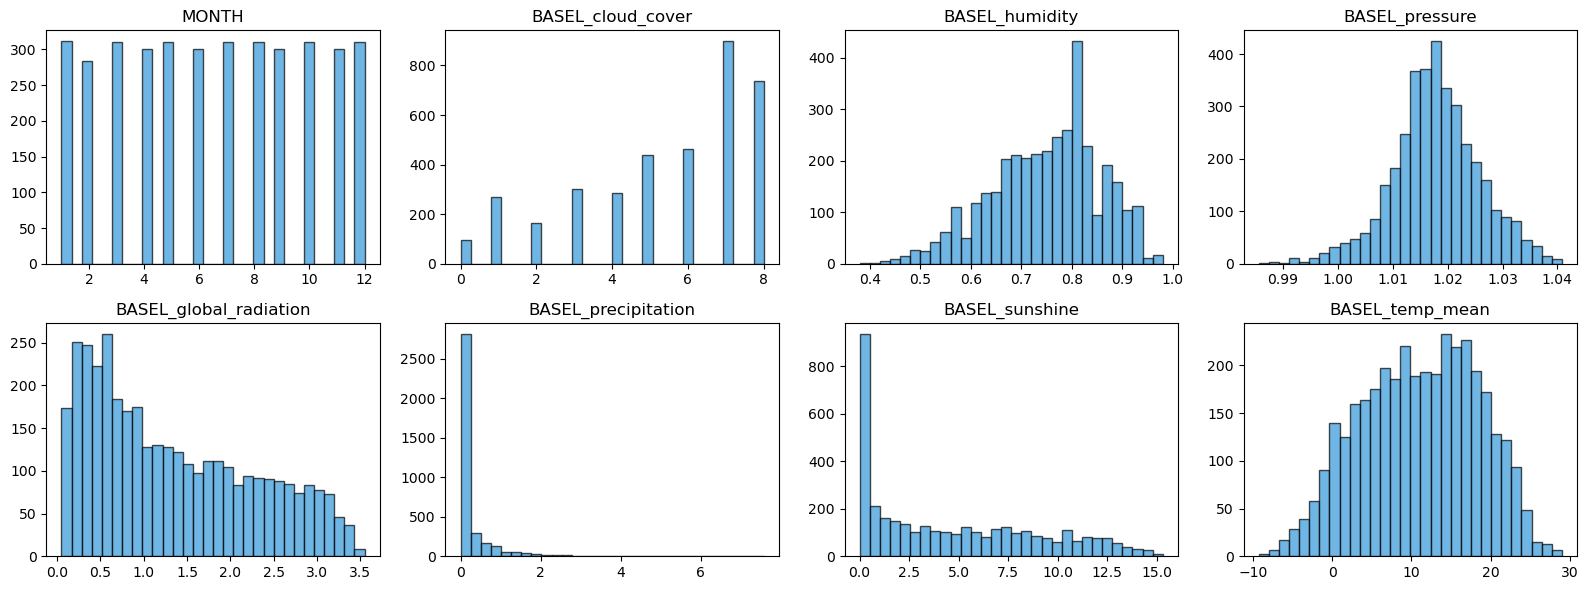

In [54]:
# 4.1 Missing Values Bar Plot
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    plt.figure(figsize=(12, 4))
    missing_data[missing_data > 0].plot(kind='bar', color='#e74c3c')
    plt.title('Missing Values by Column')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# 4.2 Feature Distributions (first few numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns[:8]

fig, axes = plt.subplots((len(numeric_cols) + 3)//4, 4,
                         figsize=(16, 3*((len(numeric_cols)+3)//4)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30,
                 color='#3498db', edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()





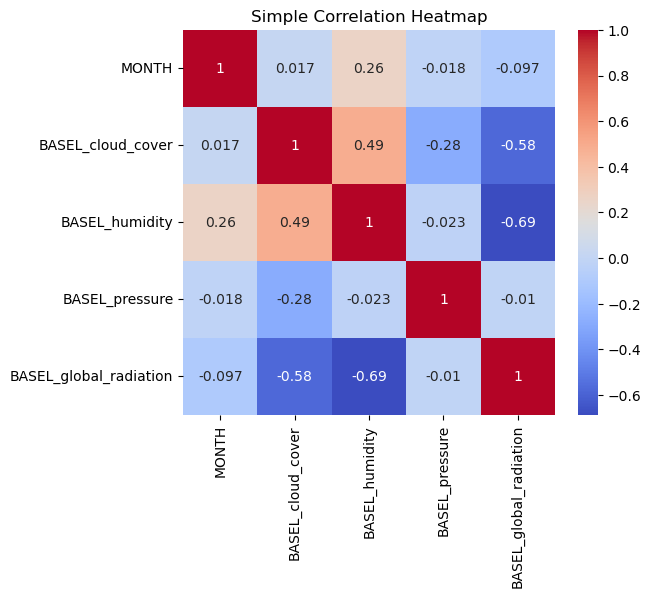

In [65]:
      


# Pick ONLY 4–6 numeric columns
cols = df.select_dtypes(include="number").columns[:5]

corr = df[cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Simple Correlation Heatmap")
plt.show()
       

In [85]:
# choose numeric target
target_col = "BASEL_temp_mean"

X = df.drop(columns=[target_col])
y = df[target_col]

print("Target:", target_col)
print(y.describe())

#Train-test split (NO stratify — regression!)



Target: BASEL_temp_mean
count    3654.000000
mean       11.022797
std         7.414754
min        -9.300000
25%         5.300000
50%        11.400000
75%        16.900000
max        29.000000
Name: BASEL_temp_mean, dtype: float64


In [87]:

#Train-test split (NO stratify — regression!)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (2923, 163)
Test size: (731, 163)


In [89]:
# Linear  Regression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.3435235049808826
R²: 0.9963549646002762


In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)       


In [117]:

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    print(f"{name} trained!")



Training Linear Regression...
Linear Regression trained!

Training Decision Tree...
Decision Tree trained!

Training Random Forest...
Random Forest trained!


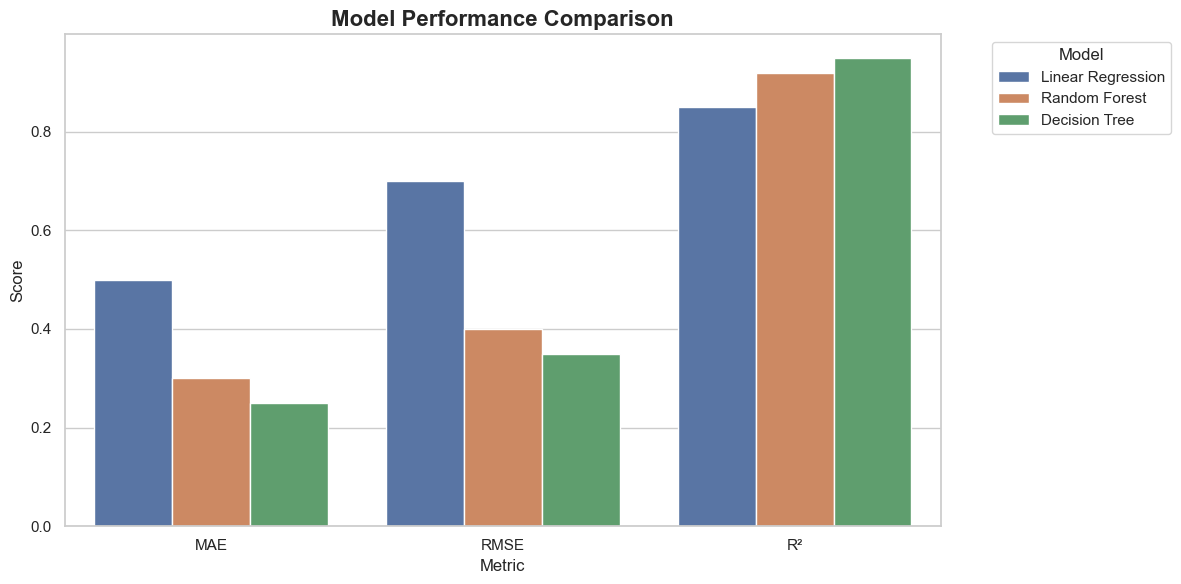

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example results_df
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Decision Tree"],
    "MAE": [0.5, 0.3, 0.25],
    "RMSE": [0.7, 0.4, 0.35],
    "R²": [0.85, 0.92, 0.95]
})

sns.set(style="whitegrid")
results_long = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=results_long, x="Metric", y="Score", hue="Model")
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [131]:

# Save best model & scaler for deployment
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Best model and scaler saved successfully.")


Best model and scaler saved successfully.


In [135]:
# Fill with REAL feature names
new_sample = {
    "ReviewRate": [4.5],
    "NumOfReviews": [120],
    "Duration": [3],
    "Persons": [2],
    "Stars": [4],
    "Taxes": [500]
}

# Create new DataFrame
new_df = pd.DataFrame(new_sample)

# Encode categorical columns (safe check)
for col in categorical_columns:
    if col in new_df.columns:
        new_df[col] = label_encoders[col].transform(new_df[col])

# Align columns with training data
new_df = new_df.reindex(columns=X.columns, fill_value=0)

# Scale
new_scaled = scaler.transform(new_df)

# Predict
prediction = best_model.predict(new_scaled)

# SHOW OUTPUT (THIS WAS MISSING)
print("Predicted value:", prediction[0])


Predicted value: 0.9356164283611808


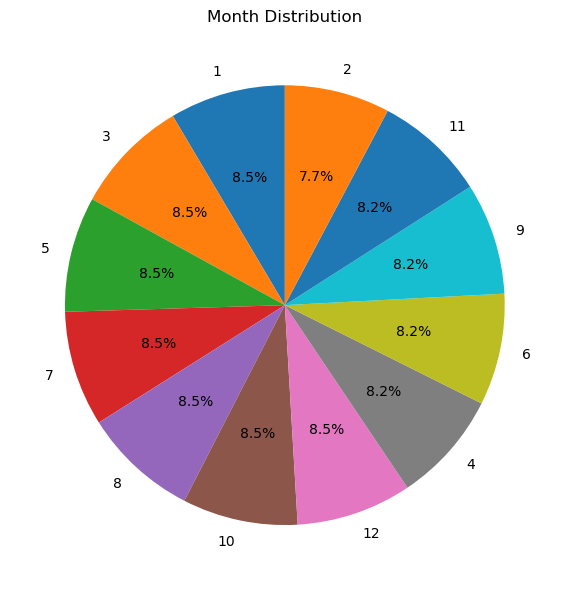

In [140]:

# Pie chart using MONTH (categorical column)
target_counts = df['MONTH'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    target_counts.values,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Month Distribution')
plt.tight_layout()
plt.show()



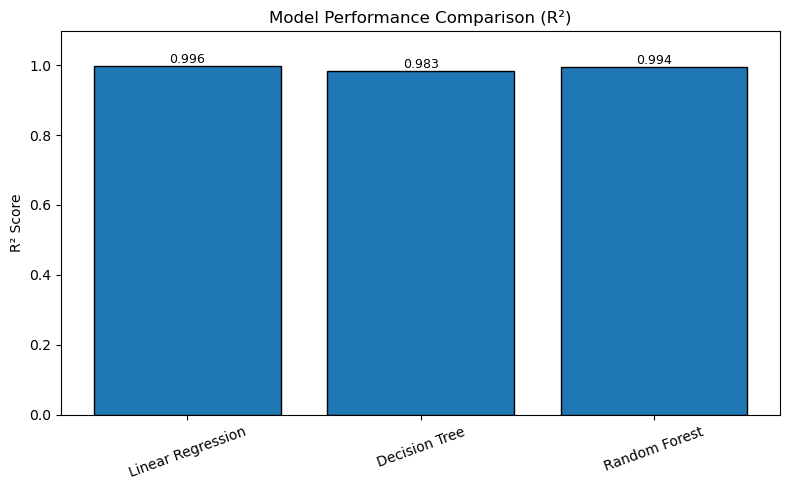

In [148]:
# Bar chart comparing model accuracies

plt.figure(figsize=(8, 5))

# If Model is index, reset it
plot_df = results_df.copy()
if 'Model' not in plot_df.columns:
    plot_df = plot_df.reset_index().rename(columns={'index': 'Model'})

r2_scores = plot_df['R²']

bars = plt.bar(
    plot_df['Model'],
    r2_scores,
    edgecolor='black'
)

plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R²)')
plt.xticks(rotation=20)
plt.ylim(0, max(r2_scores) + 0.1)

for bar, r2 in zip(bars, r2_scores):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        r2,
        f'{r2:.3f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

